# Clean and Tranform Data --Part Two

## 2012 Data Files

The following steps are applied to clean and transform the 2012 data files.
+ The data dictionary of each file were studied to understand what each feature represent
+ Remove features that:
    + leak information from the future
    + contain redundant information
    + don't affect target variables, such as randomly generated fields
+ Clean data
    + Handle missing values and duplicates

In [14]:
#Inspect 2012 survey sites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 14
site2012 = pd.read_csv('https://www.epa.gov/sites/production/files/2016-12/nla2012_wide_siteinfo_08232016.csv')
print(site2012.shape)
site2012.head()

(2764, 111)


,SITE_ID,VISIT_NO,UID,DATE_COL,AGGR_ECO3_2015,AGGR_ECO9_2015,AREA_HA,AREACLS,BORD_LAKE,CAT_UNIQUE,CH0712_CAT,CH0712_USE,CH0712_WGT,CNTYNAME,COMID2007,COMID2012,COMIDS2007,DES_FTYPE,DSGN12,ELEVATION,EPA_REG,EVAL_NAME,EVALSTAT,FEOW_ID,FS_EW,FW_ECO3,FW_ECO9,GNIS_ID,GNIS_NAME,HUC2,HUC8,LAKE_ORIGIN,LAKE_ORIGIN12,LAT_DD83,LON_DD83,MAJ_BASIN,MDCATY,MISS_BASIN,NA_L1CODE,NA_L2CODE,NA_L3CODE,NARS_NAME,NES_LAKE,NESLAKE_ID,NESSTORET,OWN_TYPE,OWNSHP,PANEL,PERIM_KM,RCHCODE,...,ST_WGT_CAT,ST_WGT_DSGN,STATE,STATE_NLA,STATE_PCNT,STATECTY,STATUS,STATUS_ST,STRATUM,TNT,TNT_ST,URBAN,US_L3CODE,US_L3CODE_2015,US_L4CODE,US_L4CODE_2015,WGT_ALL,WGT_CAT,WGT_DSGN,XCOORD,YCOORD,ECO_BIO,IM_COMMENT,INDEX_NLA,INDXSAMP_BENT,INDXSAMP_CHEM,INDXSAMP_CHLA,INDXSAMP_CORE,INDXSAMP_ENTE,INDXSAMP_MICR,INDXSAMP_PHAB,INDXSAMP_SDHG,INDXSAMP_ZOOP,REF_NLA12_NUTR,RT_NLA12_BENT,RT_NLA12_ZOOP,SAMPLED_BENT,SAMPLED_CORE,SAMPLED_ENTE,SAMPLED_MICR,SAMPLED_PHAB,SAMPLED_PHYT,SAMPLED_PROFILE,SAMPLED_SDHG,SAMPLED_ZOCN,SAMPLED_ZOCR,SAMPLED_ZOFN,SAMPLED_ZOFR,SAMPLED_ZOOP,PUBLICATION_DATE
0,NLA12_AL-101,1.0,6300.0,5/24/2012,EHIGH,SAP,1301.871970,F:500+,No,NLA07RVT,NLA07_RVT12,Include,20.288885,TUSCALOOSA,21656744.0,166759236,21656744,Lake/Pond:...,Included,57.03,Region_4,Holt Lock ...,TargetSamp...,153,NaN,EHIGH,SAP,NaN,NaN,3,3160112,MAN_MADE,RESERVOIR,33.292041,-87.391382,3,NonREF07,No,8,8.4,8.4.9,Holt Lock ...,NESLake,105,105,Non Federal,Non-Federal,NLA07RVT2,104.208666,3.16011E+12,...,NaN,0.0,AL,AL,100,1073,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,68,68,68f,68f,20.288885,AL_>4,3.666670,795432.2051,-434840.7897,EHIGH,No phab do...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,T,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
1,NLA12_AL-101,2.0,7374.0,7/21/2012,EHIGH,SAP,1301.871970,F:500+,No,NLA07RVT,NLA07_RVT12,Include,20.288885,TUSCALOOSA,21656744.0,166759236,21656744,Lake/Pond:...,Included,57.03,Region_4,Holt Lock ...,TargetSamp...,153,NaN,EHIGH,SAP,NaN,NaN,3,3160112,MAN_MADE,RESERVOIR,33.292041,-87.391382,3,NonREF07,No,8,8.4,8.4.9,Holt Lock ...,NESLake,105,105,Non Federal,Non-Federal,NLA07RVT2,104.208666,3.16011E+12,...,NaN,0.0,AL,AL,100,1073,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,68,68,68f,68f,20.288885,AL_>4,3.666670,795432.2051,-434840.7897,EHIGH,Assigned a...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,T,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
2,NLA12_AL-102,1.0,7228.0,7/17/2012,EHIGH,SAP,72.950420,D:50-100,No,NLA07RVT,NLA07_RVT12,Include,46.617902,CULLMAN,18587568.0,18587568,18587568,Lake/Pond:...,Included,247.04,Region_4,George Lake,TargetSamp...,153,NaN,EHIGH,SAP,131985.0,George Lake,3,3160109,MAN_MADE,RESERVOIR,34.227816,-86.843449,3,NonREF07,No,8,8.4,8.4.9,George Lake,NaN,NaN,NaN,Non Federal,Non-Federal,NLA07RVT,11.872305,3.16011E+12,...,NaN,0.0,AL,AL,100,1043,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,68,68,68d,68d,46.617902,AL_>4,3.666667,835851.3010,-326047.1005,EHIGH,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
3,NLA12_AL-103,1.0,7292.0,7/19/2012,EHIGH,SAP,10363.258480,F:500+,No,NLA07RVT,NLA07_RVT12,Include,51.331899,TALLADEGA,22273142.0,166759059,22273142,Lake/Pond:...,Included,141.76,Region_4,Logan Mart...,TargetSamp...,153,NaN,EHIGH,SAP,NaN,NaN,3,3150106,MAN_MADE,RESERVOIR,33.762478,-86.053158,3,NonREF07,No,8,8.4,8.4.1,NaN,NaN,NaN,NaN,Non Federal,Non-Federal,NLA07RVT,688.459134,3.15011E+12,...,NaN,0.0,AL,AL,100,1055,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,67,67,67g,67g,51.331899,AL_>4,3.666667,913172.7602,-370517.4939,EHIGH,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
4,NLA12_AL-104,1.0,7368.0,7/23/2012,PLNLOW,CPL,4731.474336,F:500+,No,NLA07RVT,NLA07_RVT12,Include,101.491046,SUMTER,21677972.0,21677972,21677972,Lake/Pond:...,Included,22.28,Region_4,Demopolis ...,TargetSamp...,153,NaN,PLNLOW,CPL,NaN,NaN,3,3160201,MAN_MADE,RESERVOIR,32.515869,-87.861085,3,NonREF07,No,8,8.3,8.3.5,NaN,NaN,NaN,NaN,Non Federal,Non

In [15]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 15
water_chem2012 = pd.read_csv('https://www.epa.gov/sites/production/files/2016-12/nla2012_waterchem_wide.csv')
print(water_chem2012.shape)
water_chem2012.head(3)

(1230, 233)


,UID,SAM_CODE,LAB,ALUMINUM_BATCH_ID,AMMONIA_N_BATCH_ID,ANC_BATCH_ID,CALCIUM_BATCH_ID,CHLORIDE_BATCH_ID,COLOR_BATCH_ID,COND_BATCH_ID,DOC_BATCH_ID,MAGNESIUM_BATCH_ID,NITRATE_N_BATCH_ID,NITRATE_NITRITE_N_BATCH_ID,NITRITE_N_BATCH_ID,NTL_BATCH_ID,PH_BATCH_ID,POTASSIUM_BATCH_ID,PTL_BATCH_ID,SILICA_BATCH_ID,SODIUM_BATCH_ID,SULFATE_BATCH_ID,TOC_BATCH_ID,TSS_BATCH_ID,TURB_BATCH_ID,ALUMINUM_UNITS,AMMONIA_N_UNITS,ANC_UNITS,CALCIUM_UNITS,CHLORIDE_UNITS,COLOR_UNITS,COND_UNITS,DOC_UNITS,MAGNESIUM_UNITS,NITRATE_N_UNITS,NITRATE_NITRITE_N_UNITS,NITRITE_N_UNITS,NTL_UNITS,PH_UNITS,POTASSIUM_UNITS,PTL_UNITS,SILICA_UNITS,SODIUM_UNITS,SULFATE_UNITS,TOC_UNITS,TSS_UNITS,TURB_UNITS,ALUMINUM_DATE_ANALYZED,ALUMINUM_HOLDING_TIME,ALUMINUM_LAB_FLAG,...,SODIUM_QA_FLAG,SODIUM_RESULT,SODIUM_RL,SULFATE_DATE_ANALYZED,SULFATE_HOLDING_TIME,SULFATE_LAB_FLAG,SULFATE_LAB_SAMPLE_ID,SULFATE_MDL,SULFATE_QA_FLAG,SULFATE_RESULT,SULFATE_RL,TOC_HOLDING_TIME,TOC_RESULT,TSS_DATE_ANALYZED,TSS_HOLDING_TIME,TSS_LAB_SAMPLE_ID,TSS_MDL,TSS_QA_FLAG,TSS_RESULT,TSS_RL,TURB_DATE_ANALYZED,TURB_HOLDING_TIME,TURB_LAB_FLAG,TURB_LAB_SAMPLE_ID,TURB_MDL,TURB_QA_FLAG,TURB_RESULT,TURB_RL,ANC_FLAG,CALCIUM_FLAG,CHLORIDE_FLAG,COLOR_FLAG,COND_FLAG,DOC_FLAG,MAGNESIUM_FLAG,NITRATE_N_FLAG,NITRATE_NITRITE_N_FLAG,NTL_FLAG,PH_FLAG,POTASSIUM_FLAG,PTL_FLAG,SILICA_FLAG,SODIUM_FLAG,SULFATE_FLAG,TSS_FLAG,TURB_FLAG,CHEM_SAMPLE_ID,CHEM_SHIP_FLAG,NUTS_SAMPLE_ID,NUTS_SHIP_FLAG
0,1000001,REGULAR,WRS,110731.1,120613.1,120607.1,120731.1,120608.1,120607.1,120607.1,120619.1,120731.1,120608.1,120608.1,120608.1,120618.1,120607.1,120731.1,120618.1,120607.1,120731.1,120608.1,NaN,NaN,120607.1,mg/L,mg N/L,ueq/L,mg/L,mg/L,APHA Pt-Co,uS/cm @ 25C,mg/L,mg/L,mg N/L,mg N/L,mg N/L,mg/L,Std. Units,mg/L,ug/L,mg/L,mg/L,mg/L,NaN,NaN,NTU,7/31/2012,56.0,<LRL (0.02),...,NaN,1.636,0.04,6/8/2012,3.0,NaN,1210066,0.09,NaN,3.371,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/7/2012,2.0,NaN,1210066,NaN,NaN,1.57,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634490,NaN,634493,NaN
1,1000010,REGULAR,WRS,110731.1,120613.1,120608.1,120731.1,120608.1,120608.1,120608.1,120619.1,120731.1,120608.1,120608.1,120608.1,120618.1,120608.1,120731.1,120618.1,120612.1,120731.1,120608.1,NaN,NaN,120608.1,mg/L,mg N/L,ueq/L,mg/L,mg/L,APHA Pt-Co,uS/cm @ 25C,mg/L,mg/L,mg N/L,mg N/L,mg N/L,mg/L,Std. Units,mg/L,ug/L,mg/L,mg/L,mg/L,NaN,NaN,NTU,7/31/2012,55.0,NaN,...,NaN,1.537,0.04,6/8/2012,2.0,NaN,1210084,0.09,NaN,0.959,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/8/2012,2.0,NaN,1210084,NaN,NaN,21.78,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630230,NaN,630233,NaN
2,1000011,REGULAR,WRS,110731.1,120613.1,120609.1,120731.1,120611.1,120609.1,120609.1,120619.1,130204.1,120611.1,120611.1,120611.1,120618.1,120609.1,120731.1,120618.1,120612.1,120731.1,120611.1,NaN,NaN,120609.1,mg/L,mg N/L,ueq/L,mg/L,mg/L,APHA Pt-Co,uS/cm @ 25C,mg/L,mg/L,mg N/L,mg N/L,mg N/L,mg/L,Std. Units,mg/L,ug/L,mg/L,mg/L,mg/L,NaN,NaN,NTU,7/31/2012,54.0,<LRL (0.02),...,NaN,1.049,0.04,6/11/2012,4.0,NaN,1210087,0.09,NaN,1.110,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/9/2012,2.0,NaN,1210087,NaN,NaN,8.12,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,621560,NaN,621563,NaN


In [16]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 15
secchi2012 = pd.read_csv('https://www.epa.gov/sites/production/files/2016-12/nla2012_secchi_08232016.csv')
print(secchi2012.shape)
secchi2012.head(3)

(1221, 15)


,UID,SITE_ID,AGGR_ECO3_2015,AGGR_ECO9_2015,STATE,ECO_BIO,YEAR,VISIT_NO,DATE_COL,CLEAR_TO_BOTTOM,DISAPPEARS,REAPPEARS,SAMPLE_DEPTH,SECCHI,PUBLICATION_DATE
0,6160,NLA12_CA-143,WMTNS,XER,CA,WMTNS,2012,1,5/2/2012,NaN,5.14,4.53,NaN,4.835,8/23/2016
1,6187,NLA12_AZ-101,WMTNS,XER,AZ,WMTNS,2012,1,5/8/2012,NaN,2.90,2.80,NaN,2.850,8/23/2016
2,6189,NLA12_ND-115,PLNLOW,NPL,ND,PLAINS,2012,1,5/16/2012,NaN,2.30,2.10,NaN,2.200,8/23/2016


In [17]:
pd.options.display.max_columns = 100
isotop_var2012 = pd.read_csv('https://www.epa.gov/sites/production/files/2018-08/nla2012_isotopes_wide.csv')
print(isotop_var2012.shape)
isotop_var2012.head(3)

(1229, 14)


,UID,SITE_ID,VISIT_NO,DATE_COL,AGGR_ECO3_2015,AGGR_ECO9_2015,STATE,ECO_BIO,LAB,d18O_H2O,dD_H2O,E_I,RT,PUBLICATION_DATE
0,6187,NLA12_AZ-101,1,5/8/2012,WMTNS,XER,AZ,WMTNS,ISIRF,-6.558900,-53.272548,0.052555,0.279433,8/13/2018
1,6189,NLA12_ND-115,1,5/16/2012,PLNLOW,NPL,ND,PLAINS,ISIRF,-8.223736,-71.388330,0.118463,0.115655,8/13/2018
2,6192,NLA12_AZ-118,1,5/9/2012,WMTNS,XER,AZ,WMTNS,ISIRF,-6.431313,-54.984239,0.171641,0.006621,8/13/2018


In [18]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 15
chla2012 = pd.read_csv('https://www.epa.gov/sites/production/files/2016-11/nla2012_chla_wide.csv')
print(chla2012.shape)
chla2012.head(3)

(1230, 34)


,UID,LAB,CHLL_BATCH_ID,CHLX_BATCH_ID,CHLL_UNITS,CHLX_UNITS,CHLL_DATE_ANALYZED,CHLL_DATE_FILTERED,CHLL_DILUTION_FACTOR,CHLL_EXTRACT,CHLL_HOLDING_TIME,CHLL_LAB_FLAG,CHLL_LAB_SAMPLE_ID,CHLL_MDL,CHLL_QA_FLAG,CHLL_RESULT,CHLL_RL,CHLL_SAMPLEVOL,CHLL_VOLUME_ADJUST,CHLX_DATE_ANALYZED,CHLX_DATE_FILTERED,CHLX_DILUTION_FACTOR,CHLX_EXTRACT,CHLX_HOLDING_TIME,CHLX_LAB_FLAG,CHLX_LAB_SAMPLE_ID,CHLX_MDL,CHLX_QA_FLAG,CHLX_RESULT,CHLX_RL,CHLX_SAMPLEVOL,CHLX_VOLUME_ADJUST,CHLL_LAB_COMMENT,CHLX_LAB_COMMENT
0,6160,WPCL,L-203-12,L-203-12,ug/L,ug/L,NaN,NaN,NaN,72.0,NaN,<LRL (5),NLA12_CA-143,4.0,L,4.00,5.0,1000.0,NaN,NaN,NaN,NaN,83.0,NaN,<MDL (4),NLA12_CA-143,4.0,ND;X2,2.700,5.0,1250.0,NaN,WPCL_8939_W...,WPCL_8939_W...
1,6187,WRS,120523.1,120523.1,ug/L,ug/L,23-May-12,NaN,NaN,82.7,15.0,NaN,1210001,0.5,NaN,3.31,1.0,1000.0,NaN,23-May-12,NaN,NaN,80.7,15.0,NaN,1210001,0.5,NaN,3.228,1.0,1000.0,NaN,NaN,NaN
2,6189,WRS,120523.1,120524.1,ug/L,ug/L,23-May-12,NaN,NaN,129.0,7.0,NaN,1210008,0.5,NaN,5.16,1.0,1000.0,NaN,24-May-12,NaN,NaN,187.0,8.0,NaN,1210008,0.5,NaN,7.480,1.0,1000.0,NaN,NaN,NO LABEL


Initial observations
+ In addition to site_id (Identification code for site), the 2012 data files have UID (Unique site visit)column

### Filter Features

We are interested in features that are in 2007 data file.

#### Features names in combined 2007 files

In [19]:
# Filtered features from site file
site_col = ['SITE_ID', 'DATE_COL', 'LAT_DD', 'LON_DD', 'EPA_REG', 'URBAN', 'LAKE_ORIGIN', 'AREA_HA', 
            'LAKEAREA', 'LAKEPERIM', 'SLD', 'DEPTHMAX','ELEV_PT']

water_chem2007_col = ['SITE_ID', 'SAMPLE_DEPTH', 'PH_LAB', 'NTL', 'PTL','TURB', 'CL', 'NA', 'DOC', 'K', 'TURB',
                      'MG', 'TOC', 'CA', 'SO4', 'SIO2' ]

trophic_cond_col = ['SITE_ID','CHLA', 'SECMEAN']

istop_var_col = ['SITE_ID', 'DATE_COL', 'd18O_H2O', 'dD_H2O', 'E_I', 'RT']

#### Features names in combined 2012 files

In [20]:
# Filtered features from site file

site_col = ['UID', 'SITE_ID', 'DATE_COL', 'LAT_DD83', 'LON_DD83', 'EPA_REG', 'URBAN', 'LAKE_ORIGIN', 
            'AREA_HA', 'PERIM_KM', 'ELEVATION']

water_chem_col = ['UID', 'PH_RESULT', 'PTL_RESULT', 'NTL_RESULT', 'TURB_RESULT', 'CALCIUM_RESULT', 
                  'CHLORIDE_RESULT','DOC_RESULT', 'COND_RESULT', 'SODIUM_RESULT', 'POTASSIUM_RESULT',
                 'MAGNESIUM_RESULT', 'SILICA_RESULT', 'SULFATE_RESULT', 'TOC_RESULT']


secchi_col = ['UID', 'SECCHI', 'SAMPLE_DEPTH']


istop_var_col = ['UID', 'SITE_ID', 'DATE_COL', 'd18O_H2O', 'dD_H2O', 'E_I', 'RT']


chla_col = ['UID', 'CHLL_RESULT']

#### Filtered 2012 data files

In [21]:
site2012_filtered = site2012[site_col]
water_chem2012_filtered = water_chem2012[water_chem_col]
secchi2012_filtered = secchi2012[secchi_col]
isotop_var2012_filtered = isotop_var2012[istop_var_col]
chla2012_filtered = chla2012[chla_col]

#### Dictionary of Filtered Features
Features in red are candidate features for modeling whereas features in blue will serve as a frame for combining data and analyzing model predictions

**Site information**
+ <font color=blue>SITE_ID</font> (sampled site), <font color=blue>DATE_COL</font> (date sample collected), <font color=blue>LAT_DD83</font> (latitude), <font color=blue>LON_DD83</font> (longitude), <font color=blue>EPA_REG</font> (U.S. EPA divide the nation into 10 regions), <font color=blue>URBAN</font> (is it urban lake, yes/no), <font color=blue>LAKE_ORIGIN</font> (man-made or natural), <font color=red>AREA_HA</font> (area of lake in hectares), <font color=red>LAKEPERIM</font> (lake perimeter in kilometers), <font color=red>SLD</font> (Shoreline development index) and <font color=red>ELEVATION</font> (lake elevation in meters)
    
**Water chemistry condition**
+ <font color=blue>UID</font> (unique identification code), <font color=SAMPLE_DEPTH></font> (water depth at sampled site in meters), <font color=red>CHLORIDE_RESULT</font> (Chloride in ug/L), <font color=red>PH_RESULT</font> (pH), <font color=red>NTL_RESULT</font> (total nitrogen in in mg/L), <font color=red>PTL_RESULT</font> (total phosphorus in in ug/L), <font color=red>TURB_RESULT</font> (turbidity in NTU), <font color=red>COND_RESULT</font> (Conductivity in uS/cm @ 25 C), <font color=red>SODIUM_RESULT</font> (sodium in mg/L), <font color=red>DOC_RESULT</font> (Dissolved Organic Carbon in mg/L), <font color=red>POTASSIUM_RESULT</font> (Potassium in mg/L), <font color=red>MAGNESIUM_RESULT</font> (Magnesium  in mg/L), <font color=red>CALCIUM_RESULT</font> (Calcium in mg/l/L), <font color=red>SULFATE_RESULT</font> (Sulfate in mg/L), <font color=red>SILICA_RESULT</font> (Silica in mg/L), 
<font color=red>TOC_RESULT</font> (Total organic carbon in mg/L)

**Trophic condition**
+ <font color=blue>SITE_ID</font> (sampled site), <font color=red>CHLA</font> (Chlorophyll a concentration in µg/L),<font color=red>SECMEAN</font> (Secchi transparency in meters, avg. of disk disappearance and reappearance depths)

**Water isotop variables**
+ <font color=blue>SITE_ID</font> (sampled site), <font color=blue>DATE_COL</font> (date sample collected)
+ <font color=red>d18O_H2O</font> (Stable oxygen isotope ratios of water in parts per thousand)
+ <font color=red>dD_H2O</font> (Stable hydrogen isotope ratios of water in parts per thousand)
+ <font color=red>E_I</font> (Evaporation-inflow ratio, the proportion of inflowing water to a lake that is lost through evaporation, estimated from water isotopes)

### Missing values

In [22]:
# identify columns with missing values
print('Number of rows and columns: ' + str(site2012_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(site2012_filtered.isnull().sum()))

Number of rows and columns: (2764, 11)
--------------------------------------
Number of missing values: 
--------------------------------------
UID            1378
SITE_ID           0
DATE_COL       1378
LAT_DD83          0
LON_DD83          0
EPA_REG           0
URBAN             0
LAKE_ORIGIN     755
AREA_HA           0
PERIM_KM          0
ELEVATION         0
dtype: int64


In [23]:
print('Number of rows and columns: ' + str(water_chem2012_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(water_chem2012_filtered.isnull().sum()))

Number of rows and columns: (1230, 15)
--------------------------------------
Number of missing values: 
--------------------------------------
UID                    0
PH_RESULT              0
PTL_RESULT             0
NTL_RESULT             0
TURB_RESULT           41
CALCIUM_RESULT         0
CHLORIDE_RESULT        0
DOC_RESULT             0
COND_RESULT            0
SODIUM_RESULT          1
POTASSIUM_RESULT       2
MAGNESIUM_RESULT       0
SILICA_RESULT          0
SULFATE_RESULT         0
TOC_RESULT          1178
dtype: int64


In [24]:
print('Number of rows and columns: ' + str(secchi2012_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(secchi2012_filtered.isnull().sum()))

Number of rows and columns: (1221, 3)
--------------------------------------
Number of missing values: 
--------------------------------------
UID                0
SECCHI            66
SAMPLE_DEPTH    1220
dtype: int64


In [25]:
print('Number of rows and columns: ' + str(isotop_var2012_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(isotop_var2012_filtered.isnull().sum()))

Number of rows and columns: (1229, 7)
--------------------------------------
Number of missing values: 
--------------------------------------
UID          0
SITE_ID      0
DATE_COL     0
d18O_H2O     0
dD_H2O       0
E_I          4
RT          58
dtype: int64


In [26]:
print('Number of rows and columns: ' + str(chla2012_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(chla2012_filtered.isnull().sum()))

Number of rows and columns: (1230, 2)
--------------------------------------
Number of missing values: 
--------------------------------------
UID            0
CHLL_RESULT    9
dtype: int64


Four features have rows with missing values: DEPTH_X, DEPTHMAX, CHLA, and SECMEAN. 
+ UID and DATE_COL in the site information data file have over 50% of rows with missing values. These features are index columns that will be used as key id to merge other files. Remove rows where UID and DATE_COL have missing values
+ LAKE_ORIGIN has also the highest number of missing values. Explore this after removing missing values from UID and DATE_COL columns.
+ TOC_RESULT and SAMPLE_DEPTH contain over 99% of rows with missing values. Remove these features 
+ TURB_RESULT, SODIUM_RESULT, POTASSIUM_RESULT, SECCHI, E_I, RT, and CHLL_RESULT contains 1-58 rows with missing values. Replace missing values.

##### Explore missing values in UID and DATE_COL

In [27]:
site2012_filtered[(site2012_filtered.UID.isnull()) | (site2012_filtered.DATE_COL.isnull())]

,UID,SITE_ID,DATE_COL,LAT_DD83,LON_DD83,EPA_REG,URBAN,LAKE_ORIGIN,AREA_HA,PERIM_KM,ELEVATION
7,NaN,NLA12_AL-106,NaN,31.394843,-86.007217,Region_4,No,MAN_MADE,2.259936,0.657412,96.12
8,NaN,NLA12_AL-107,NaN,32.187136,-86.508415,Region_4,No,MAN_MADE,13.359930,1.992119,77.74
9,NaN,NLA12_AL-108,NaN,33.868821,-86.623677,Region_4,No,NaN,2.666005,0.885433,181.48
10,NaN,NLA12_AL-109,NaN,31.074113,-87.409755,Region_4,No,NaN,10.654088,1.533036,83.23
11,NaN,NLA12_AL-110,NaN,34.873484,-85.770445,Region_4,No,NaN,12.815135,2.377971,181.82
12,NaN,NLA12_AL-111,NaN,32.345718,-85.234214,Region_4,No,NaN,4.177937,1.527309,122.24
35,NaN,NLA12_AZ-104,NaN,36.276203,-109.203271,Region_9,No,MAN_MADE,105.188590,7.881711,2142.70
36,NaN,NLA12_AZ-105,NaN,34.786375,-111.230420,Region_9,No,MAN_MADE,49.382866,3.404530,2066.00
39,NaN,NLA12_AZ-108,NaN,36.726295,-110.279548,Region_9,Yes,NaN,10.146370,2.321353,1756.67
40,NaN,NLA12_AZ-109,NaN,33.979990,-109.313073,Region_9,No,NaN,2.524545,0.590003,2822.09


It looks rows with UID values missed also have missed DATE_COL values. All rows with UID and DATE_COL missing values can be removed.

In [28]:
site2012_filtered = site2012_filtered.dropna(subset=['UID', 'DATE_COL'])

In [29]:
site2012_filtered[(site2012_filtered.UID.isnull()) | (site2012_filtered.DATE_COL.isnull())].sum()

UID            0.0
SITE_ID        0.0
DATE_COL       0.0
LAT_DD83       0.0
LON_DD83       0.0
EPA_REG        0.0
URBAN          0.0
LAKE_ORIGIN    0.0
AREA_HA        0.0
PERIM_KM       0.0
ELEVATION      0.0
dtype: float64

This also removes missing values from URBAN feature.

##### Remove TOC_RESULT and SAMPLE_DEPTH features

In [30]:
water_chem2012_filtered = water_chem2012_filtered.drop('TOC_RESULT', axis = 1)
secchi2012_filtered = secchi2012_filtered.drop('SAMPLE_DEPTH', axis = 1)

##### Replace missing values for other features

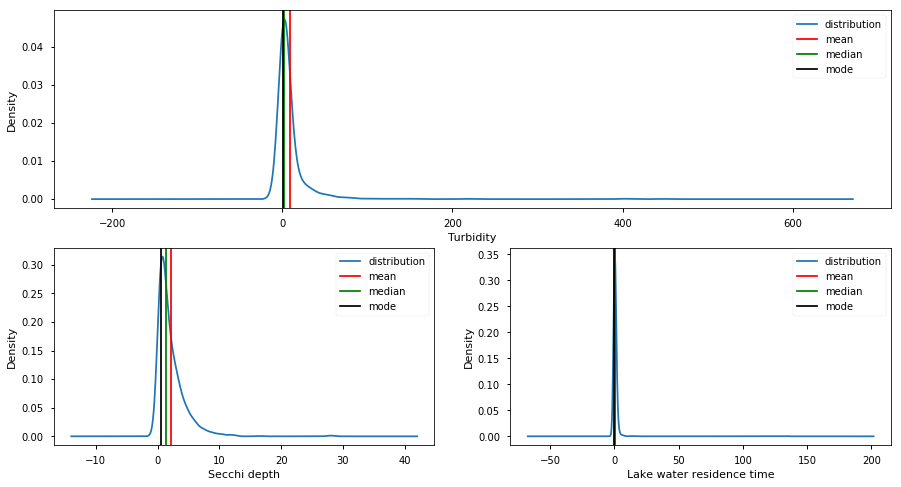

In [31]:
# Plot distribution  
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams.update({'font.size': 22})

ax1 = plt.subplot(2, 1, 1)
ax1 = water_chem2012_filtered['TURB_RESULT'].plot.kde(label = 'distribution', figsize = (15,8))
ax1.axvline(water_chem2012_filtered['TURB_RESULT'].mean(), label = 'mean', color = 'red')
ax1.axvline(water_chem2012_filtered['TURB_RESULT'].median(), label = 'median', color = 'green')
ax1.axvline(water_chem2012_filtered['TURB_RESULT'].mode()[0], label = 'mode', color = 'black')
plt.xlabel('Turbidity')
ax1.legend()

ax2 = plt.subplot(2, 2, 3)

ax2 = secchi2012_filtered['SECCHI'].plot.kde(label = 'distribution', figsize = (15,8))
ax2.axvline(secchi2012_filtered['SECCHI'].mean(), label = 'mean', color = 'red')
ax2.axvline(secchi2012_filtered['SECCHI'].median(), label = 'median', color = 'green')
ax2.axvline(secchi2012_filtered['SECCHI'].mode()[0], label = 'mode', color = 'black')
plt.xlabel('Secchi depth')
ax2.legend()

ax3 = plt.subplot(2, 2, 4)

ax2 = isotop_var2012_filtered['RT'].plot.kde(label = 'distribution', figsize = (15,8))
ax2.axvline(isotop_var2012_filtered['RT'].mean(), label = 'mean', color = 'red')
ax2.axvline(isotop_var2012_filtered['RT'].median(), label = 'median', color = 'green')
ax2.axvline(isotop_var2012_filtered['RT'].mode()[0], label = 'mode', color = 'black')
plt.xlabel('Lake water residence time')
ax2.legend()

From distribution plots, mode seems the best replacing value for all features. 

In [32]:
# Replace missing values with mode value
from scipy import stats

water_chem2012_filtered.loc[:, 'TURB_RESULT'] = water_chem2012_filtered.loc[:, 'TURB_RESULT'].fillna(stats.mode)
secchi2012_filtered.loc[:, 'SECCHI'] = secchi2012_filtered.loc[:, 'SECCHI'].fillna(stats.mode)
isotop_var2012_filtered.loc[:, 'RT'] = isotop_var2012_filtered.loc[:, 'RT'].fillna(stats.mode)
water_chem2012_filtered.loc[:, 'SODIUM_RESULT'] = water_chem2012_filtered.loc[:, 'SODIUM_RESULT'].fillna(stats.mode)
water_chem2012_filtered.loc[:, 'POTASSIUM_RESULT'] = water_chem2012_filtered.loc[:, 'POTASSIUM_RESULT'].fillna(stats.mode)
isotop_var2012_filtered.loc[:, 'E_I'] = isotop_var2012_filtered.loc[:, 'E_I'].fillna(stats.mode)
chla2012_filtered.loc[:, 'CHLL_RESULT'] = chla2012_filtered.loc[:, 'CHLL_RESULT'].fillna(stats.mode)


C:\Users\Tadesse\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Check duplicates

In [33]:
site2012_filtered.duplicated().sum()

0

In [34]:
water_chem2012_filtered.duplicated().sum()

0

In [35]:
secchi2012_filtered.duplicated().sum()

0

In [36]:
isotop_var2012_filtered.duplicated().sum()

0

In [37]:
chla2012_filtered.duplicated().sum()

0

### Combing 2007 Data Sets
All 2012 data files have UID that can be used to combine all files into one dataframe. However, UID column contains duplicates as few sites surveyed multiple times (noticed in visit number column). To prevent duplicates while merging, the following strategies applied.

+ Create new helper column for UID values 
+ Merge by helper column and UID
+ Remove helper column from the merged file

In [38]:
# Create a helper column for site id (name 'id')
cols = [site2012_filtered, water_chem2012_filtered, secchi2012_filtered, isotop_var2012_filtered, chla2012_filtered]

for c in cols:
    c['id'] = c.groupby('UID').cumcount()

# Merge on helper (id) and site_id columns
combined_2012 = site2012_filtered.merge(water_chem2012_filtered, on=['id', 'UID'], how='outer').merge(
    secchi2012_filtered, on=['id', 'UID'], how='outer').merge(
    isotop_var2012_filtered, on=['id', 'UID'], how='outer').merge(
    chla2012_filtered, on=['id', 'UID'], how='outer')


combined_2012.head()

C:\Users\Tadesse\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,UID,SITE_ID_x,DATE_COL_x,LAT_DD83,LON_DD83,EPA_REG,URBAN,LAKE_ORIGIN,AREA_HA,PERIM_KM,ELEVATION,id,PH_RESULT,PTL_RESULT,NTL_RESULT,TURB_RESULT,CALCIUM_RESULT,CHLORIDE_RESULT,DOC_RESULT,COND_RESULT,SODIUM_RESULT,POTASSIUM_RESULT,MAGNESIUM_RESULT,SILICA_RESULT,SULFATE_RESULT,SECCHI,SITE_ID_y,DATE_COL_y,d18O_H2O,dD_H2O,E_I,RT,CHLL_RESULT
0,6300.0,NLA12_AL-101,5/24/2012,33.292041,-87.391382,Region_4,Yes,MAN_MADE,1301.871970,104.208666,57.03,0,8.54,30.0,0.505,2.35,21.100,9.870,2.17,299.0,22.55,2.274,11.850,4.144,72.989,2.55,NLA12_AL-101,5/24/2012,-4.210685,-23.219184,0.0372689,<function m...,7.95
1,7374.0,NLA12_AL-101,7/21/2012,33.292041,-87.391382,Region_4,Yes,MAN_MADE,1301.871970,104.208666,57.03,0,8.28,25.0,0.376,2.29,29.650,15.720,2.50,450.0,37.92,2.873,16.300,2.212,108.717,1.3,NLA12_AL-101,7/21/2012,-3.664227,-20.815118,0.0283582,<function m...,7.56
2,7228.0,NLA12_AL-102,7/17/2012,34.227816,-86.843449,Region_4,Yes,MAN_MADE,72.950420,11.872305,247.04,0,7.37,12.0,0.389,3.8,9.018,2.875,3.38,76.0,2.085,1.76,1.493,1.783,5.307,0.675,NLA12_AL-102,7/17/2012,-2.904121,-18.938855,0.113978,0.278848,8.48
3,7292.0,NLA12_AL-103,7/19/2012,33.762478,-86.053158,Region_4,Yes,MAN_MADE,10363.258480,688.459134,141.76,0,8.34,56.0,0.449,4.5,22.750,7.226,2.83,199.9,7.777,1.799,5.927,3.527,10.418,0.775,NLA12_AL-103,7/19/2012,-2.879006,-17.080202,0.102729,0.291208,12.2
4,7368.0,NLA12_AL-104,7/23/2012,32.515869,-87.861085,Region_4,Yes,MAN_MADE,4731.474336,698.108820,22.28,0,7.99,37.0,0.344,5.36,22.310,32.048,2.68,345.0,31.17,2.269,8.229,2.698,56.280,0.75,NLA12_AL-104,7/23/2012,-3.255815,-19.861913,0.0650726,<function m...,10.85


In [39]:

combined_2012.shape

(1386, 33)

In [40]:
# Remove id column and save file
combined_2012 = combined_2012.drop(['id'], axis = 1)
combined_2012.shape

(1386, 32)

In [41]:
#Check duplicates
combined_2012.duplicated().sum()

0

In [42]:
#Check missing values
combined_2012.isnull().sum()

UID                   0
SITE_ID_x             0
DATE_COL_x            0
LAT_DD83              0
LON_DD83              0
EPA_REG               0
URBAN                 0
LAKE_ORIGIN          67
AREA_HA               0
PERIM_KM              0
ELEVATION             0
PH_RESULT           156
PTL_RESULT          156
NTL_RESULT          156
TURB_RESULT         156
CALCIUM_RESULT      156
CHLORIDE_RESULT     156
DOC_RESULT          156
COND_RESULT         156
SODIUM_RESULT       156
POTASSIUM_RESULT    156
MAGNESIUM_RESULT    156
SILICA_RESULT       156
SULFATE_RESULT      156
SECCHI              165
SITE_ID_y           157
DATE_COL_y          157
d18O_H2O            157
dD_H2O              157
E_I                 157
RT                  157
CHLL_RESULT         156
dtype: int64

In [43]:
# Display rows with missing values
combined_2012[combined_2012.isnull().any(axis=1)]

,UID,SITE_ID_x,DATE_COL_x,LAT_DD83,LON_DD83,EPA_REG,URBAN,LAKE_ORIGIN,AREA_HA,PERIM_KM,ELEVATION,PH_RESULT,PTL_RESULT,NTL_RESULT,TURB_RESULT,CALCIUM_RESULT,CHLORIDE_RESULT,DOC_RESULT,COND_RESULT,SODIUM_RESULT,POTASSIUM_RESULT,MAGNESIUM_RESULT,SILICA_RESULT,SULFATE_RESULT,SECCHI,SITE_ID_y,DATE_COL_y,d18O_H2O,dD_H2O,E_I,RT,CHLL_RESULT
20,1000181.0,NLA12_AR-107,8/28/2012,34.159699,-91.067949,Region_6,No,MAN_MADE,62.357137,8.390643,42.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1000182.0,NLA12_AR-108,8/28/2012,33.146134,-91.253579,Region_6,Yes,NaN,6.393529,1.231512,30.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1000183.0,NLA12_AR-110,8/28/2012,34.493393,-91.935378,Region_6,Yes,MAN_MADE,68.092602,3.338314,64.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,6160.0,NLA12_CA-143,5/2/2012,37.564489,-121.997182,Region_9,Yes,MAN_MADE,2.481529,0.832914,13.06,8.59,26.8,0.339,<function m...,36.800,57.500,4.41,660.0,55.5,2.31,23.100,6.190,64.700,4.835,NaN,NaN,NaN,NaN,NaN,NaN,4
73,6623.0,NLA12_CA-179,6/14/2012,38.077924,-122.503609,Region_9,Yes,MAN_MADE,5.153006,0.962838,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,6938.0,NLA12_CO-126,7/2/2012,40.662084,-106.327865,Region_8,No,MAN_MADE,11.971676,1.506657,2488.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,9020.0,NLA12_IL-101,8/14/2012,37.393030,-88.687642,Region_5,No,MAN_MADE,27.947799,3.275115,111.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,7668.0,NLA12_IN-107,7/24/2012,41.418216,-85.737015,Region_5,Yes,NATURAL,53.135865,4.372895,261.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,8822.0,NLA12_IN-114,8/16/2012,41.454984,-85.242558,Region_5,Yes,NATURAL,37.522860,4.226690,304.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,7669.0,NLA12_IN-177,8/1/2012,41.687429,-85.100572,Region_5,Yes,NATURAL,14.254621,1.847760,297.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove missing values.

In [44]:
combined_2012 = combined_2012.dropna()
combined_2012.isnull().sum()

UID                 0
SITE_ID_x           0
DATE_COL_x          0
LAT_DD83            0
LON_DD83            0
EPA_REG             0
URBAN               0
LAKE_ORIGIN         0
AREA_HA             0
PERIM_KM            0
ELEVATION           0
PH_RESULT           0
PTL_RESULT          0
NTL_RESULT          0
TURB_RESULT         0
CALCIUM_RESULT      0
CHLORIDE_RESULT     0
DOC_RESULT          0
COND_RESULT         0
SODIUM_RESULT       0
POTASSIUM_RESULT    0
MAGNESIUM_RESULT    0
SILICA_RESULT       0
SULFATE_RESULT      0
SECCHI              0
SITE_ID_y           0
DATE_COL_y          0
d18O_H2O            0
dD_H2O              0
E_I                 0
RT                  0
CHLL_RESULT         0
dtype: int64

In [45]:
combined_2012.shape

(1220, 32)

In [58]:
combined_2012.dtypes.value_counts()

float64    17
object     12
dtype: int64

In [61]:
combined_2012.columns

Index(['site_id_x', 'date', 'lat', 'lon', 'epa_reg', 'urban', 'lake_origin',
       'area_ha', 'lake_perim', 'elv', 'ph', 'tp', 'tn', 'turb', 'ca', 'cl',
       'doc', 'cond', 'na', 'k', 'mg', 'sio2', 'so4', 'secmean', 'd18o_h2o',
       'dd_h2o', 'e_i', 'rt', 'chla'],
      dtype='object')

In [62]:
# check dtypes
pd.options.display.max_columns=150
combined_2012.select_dtypes(include=('object')).columns

Index(['site_id_x', 'date', 'epa_reg', 'urban', 'lake_origin', 'turb', 'na',
       'k', 'secmean', 'e_i', 'rt', 'chla'],
      dtype='object')

Six features ['turb', 'na', 'k', 'secmean', 'e_i', 'rt', 'chla'] with continous numeric values contain dtypes. This need to be explored.

In [112]:
combined_2012 = combined_2012.apply(pd.to_numeric, args=('coerce',))
combined_2012 = combined_2012.dropna()
combined_2012.dtypes.value_counts()

float64    29
dtype: int64

In [115]:
# Save combined file 
combined_2012.to_csv('combined_2012.csv')

## Combine 2007 and 2012 data files
+ Renames columns to standardize feature names
+ Change features units 
+ Merge files 
+ remove duplicates and missing values

#### Rename columns

In [116]:
# import 2007 data files
combined_2007 = pd.read_csv('combined_2007.csv')

# remove duplicate columns
combined_2007 = combined_2007.drop(['Unnamed: 0'], axis = 1)
combined_2007.columns

Index(['SITE_ID', 'DATE_COL_x', 'LAT_DD', 'LON_DD', 'EPA_REG', 'URBAN',
       'LAKE_ORIGIN', 'AREA_HA', 'LAKEAREA', 'LAKEPERIM', 'SLD', 'DEPTHMAX',
       'ELEV_PT', 'SAMPLE_DEPTH', 'PH_LAB', 'NTL', 'PTL', 'TURB', 'CL', 'COND',
       'NA', 'DOC', 'K', 'MG', 'TOC', 'CA', 'SO4', 'SIO2', 'CHLA', 'SECMEAN',
       'd18O_H2O', 'dD_H2O', 'E_I', 'RT'],
      dtype='object')

In [117]:
col_2007 = {'SITE_ID':'id', 'DATE_COL_x':'date', 'LAT_DD':'lat', 'LON_DD':'lon', 'LAKEAREA':'LAKE_AREA',
            'LAKEPERIM':'LAKE_PERIM', 'DEPTHMAX':'DEPTH_MAX', 'ELEV_PT': 'elv', 'PH_LAB': 'ph', 
            'NTL':'tn', 'PTL':'tp'}
combined_2007 = combined_2007.rename(columns=col_2007)
combined_2007.columns = map(str.lower, combined_2007.columns)

combined_2007.columns

Index(['id', 'date', 'lat', 'lon', 'epa_reg', 'urban', 'lake_origin',
       'area_ha', 'lake_area', 'lake_perim', 'sld', 'depth_max', 'elv',
       'sample_depth', 'ph', 'tn', 'tp', 'turb', 'cl', 'cond', 'na', 'doc',
       'k', 'mg', 'toc', 'ca', 'so4', 'sio2', 'chla', 'secmean', 'd18o_h2o',
       'dd_h2o', 'e_i', 'rt'],
      dtype='object')

In [118]:
#  import 2012 data files
combined_2012 = combined_2012.copy()
combined_2012.columns

Index(['site_id_x', 'date', 'lat', 'lon', 'epa_reg', 'urban', 'lake_origin',
       'area_ha', 'lake_perim', 'elv', 'ph', 'tp', 'tn', 'turb', 'ca', 'cl',
       'doc', 'cond', 'na', 'k', 'mg', 'sio2', 'so4', 'secmean', 'd18o_h2o',
       'dd_h2o', 'e_i', 'rt', 'chla'],
      dtype='object')

In [120]:
# remove duplicate columns and UID as it is not needed further
combined_2012 = combined_2012.drop(['UID', 'SITE_ID_y', 'DATE_COL_y'], axis = 1)
combined_2012.columns

Index(['site_id_x', 'date', 'lat', 'lon', 'epa_reg', 'urban', 'lake_origin',
       'area_ha', 'lake_perim', 'elv', 'ph', 'tp', 'tn', 'turb', 'ca', 'cl',
       'doc', 'cond', 'na', 'k', 'mg', 'sio2', 'so4', 'secmean', 'd18o_h2o',
       'dd_h2o', 'e_i', 'rt', 'chla'],
      dtype='object')

In [51]:
col_2012 = {'site_id_x': 'id', 'DATE_COL_x':'date', 'LAT_DD83': 'lat', 'LON_DD83': 'lon', 
            'PERIM_KM': 'lake_perim', 'ELEVATION': 'elv', 'PH_RESULT': 'ph', 'PTL_RESULT': 'tp', 
            'NTL_RESULT': 'tn', 'TURB_RESULT': 'turb', 'CALCIUM_RESULT': 'ca', 'CHLORIDE_RESULT': 'cl', 
            'DOC_RESULT': 'doc', 'COND_RESULT':'cond', 'SODIUM_RESULT':'na','POTASSIUM_RESULT':'k', 
            'MAGNESIUM_RESULT':'mg', 'SILICA_RESULT':'sio2', 'SULFATE_RESULT':'so4', 'SECCHI':'secmean', 
            'CHLL_RESULT':'chla'}
combined_2012 = combined_2012.rename(columns=col_2012)
combined_2012.columns = map(str.lower, combined_2012.columns)

combined_2012.columns

Index(['site_id_x', 'date', 'lat', 'lon', 'epa_reg', 'urban', 'lake_origin',
       'area_ha', 'lake_perim', 'elv', 'ph', 'tp', 'tn', 'turb', 'ca', 'cl',
       'doc', 'cond', 'na', 'k', 'mg', 'sio2', 'so4', 'secmean', 'd18o_h2o',
       'dd_h2o', 'e_i', 'rt', 'chla'],
      dtype='object')

#### Check feature names in 2007 and 2012 files

In [121]:
#identify features in combined_2012 that are not included in combined_2007
combined_2012.columns.difference(combined_2007.columns)

Index(['site_id_x'], dtype='object')

In [53]:
#identify features in combined_2007 that are not included in combined_2012
combined_2007.columns.difference(combined_2012.columns)

Index(['depth_max', 'id', 'lake_area', 'sample_depth', 'sld', 'toc'], dtype='object')

In [54]:
## drop features 
combined_2007 = combined_2007.drop(['depth_max', 'lake_area', 'sample_depth', 'sld', 'toc'], axis = 1)
combined_2007.columns.difference(combined_2012.columns)

Index(['id'], dtype='object')

#### Standardize units of measurement
Transfer 2007 measurements to thier equivalent unit scales in 2012
                + na (ug/l)-->(mg/l) divide by (1000)
                + tn (ug/L)-->(mg/l) divide by (1000)
                + mg (ueq/L)-->(mg/l) divide by (12.15)
                + k (ueq/L)-->(mg/l) divide by (39)
                + ca (ueq/L)-->(mg/l) divide by (20)
                + so4 (ueq/L)-->(mg/l) divide by (48)

In [122]:
# Feature with current unit 
combined_2007[['na', 'tn', 'mg', 'k', 'ca', 'so4']].head(3)

,na,tn,mg,k,ca,so4
0,10.961398,151,242.255872,3.350535,695.1070,46.34532
1,109.874963,695,63.773200,3.887643,170.3586,17.03076
2,92.736905,507,62.538880,2.557660,163.8217,13.49136


In [123]:
combined_2007 = combined_2007.copy()
unit_covertor = {'na':1000, 'tn':1000, 'mg': 12.15, 'k': 39, 'ca': 20, 'so4': 48}

for key, values in unit_covertor.items():
    combined_2007[key] = combined_2007[key].apply(lambda x: x/values)

In [124]:
# Feature with converted unit 
combined_2007[['na', 'tn', 'mg', 'k', 'ca', 'so4']].head(3)

,na,tn,mg,k,ca,so4
0,0.010961,0.151,19.938755,0.085911,34.755350,0.965527
1,0.109875,0.695,5.248823,0.099683,8.517930,0.354807
2,0.092737,0.507,5.147233,0.065581,8.191085,0.281070


#### Merge 2007 and 2012 files

In [246]:
# check feature numbers
combined_2007.shape[1]==combined_2012.shape[1]

True

In [125]:
# Concatenate  data files
df1 = combined_2007
df2 = combined_2012

comb_2007_2012 = pd.concat([df1, df2], sort=False)
comb_2007_2012.head()

,id,date,lat,lon,epa_reg,urban,lake_origin,area_ha,lake_area,lake_perim,sld,depth_max,elv,sample_depth,ph,tn,tp,turb,cl,cond,na,doc,k,mg,toc,ca,so4,sio2,chla,secmean,d18o_h2o,dd_h2o,e_i,rt,site_id_x
0,NLA06608-0001,2007-07-31,48.979029,-114.021840,Region_8,NO,NATURAL,66.293056,0.662931,3.178510,1.101247,8.3,1605.73,2.00,7.63,0.151,6.0,0.474,1.500000,96.28,0.010961,0.63,0.085911,19.938755,0.37,34.755350,0.965527,1.182,0.24,6.4,-15.73,-120.24,0.103,0.77,NaN
1,NLA06608-0002,2007-06-14,33.036064,-79.983791,Region_4,YES,MAN-MADE,14.437998,0.144380,1.743510,1.294393,2.3,4.90,1.10,6.05,0.695,36.0,3.550,178.008066,44.80,0.109875,14.02,0.099683,5.248823,15.90,8.517930,0.354807,1.695,3.84,0.55,1.24,2.32,0.366,0.26,NaN
2,NLA06608-0002,2007-07-23,33.036064,-79.983791,Region_4,YES,MAN-MADE,14.437998,0.144380,1.743510,1.294393,1.3,4.90,0.80,5.92,0.507,25.0,4.430,183.141558,42.87,0.092737,13.80,0.065581,5.147233,16.34,8.191085,0.281070,1.988,20.88,0.45,2.47,5.70,0.467,0.33,NaN
3,NLA06608-0003,2007-08-29,28.047742,-97.859866,Region_6,YES,NATURAL,5.701737,0.057017,1.265008,1.494462,2.5,17.60,1.40,8.47,0.738,43.0,7.670,4889.143422,1089.00,7.172756,6.00,3.789272,64.428456,6.75,128.617250,21.451106,45.248,16.96,0.71,-0.01,-4.84,0.204,0.17,NaN
4,NLA06608-0003,2007-09-06,28.047742,-97.859866,Region_6,YES,NATURAL,5.701737,0.057017,1.265008,1.494462,2.4,17.60,0.94,8.54,0.843,50.0,9.530,5113.606770,1120.00,7.142308,5.87,3.609580,64.313321,7.46,124.251000,20.717201,7.900,12.86,0.49,-0.66,-4.70,0.181,0.15,NaN


In [126]:
# check duplicates
comb_2007_2012.duplicated().value_counts()

False    1241
dtype: int64

In [127]:
#check missing values
comb_2007_2012.isnull().sum()

id                 0
date               0
lat                0
lon                0
epa_reg            0
urban              0
lake_origin        0
area_ha            0
lake_area          0
lake_perim         0
sld                0
depth_max          0
elv                0
sample_depth       0
ph                 0
tn                 0
tp                 0
turb               0
cl                 0
cond               0
na                 0
doc                0
k                  0
mg                 0
toc                0
ca                 0
so4                0
sio2               0
chla               0
secmean            0
d18o_h2o           0
dd_h2o             0
e_i                0
rt                 0
site_id_x       1241
dtype: int64

In [1]:
# Check dtypes
import pandas as pd
comb2007_2012 = pd.read_csv('combined_2007&2012.csv')
comb_2007_2012.dtypes.value_counts()

float64    17
object     12
dtype: int64

In [128]:
comb_2007_2012.dtypes.value_counts()

float64    28
object      7
dtype: int64

In [129]:
comb12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 33 columns):
Unnamed: 0          1220 non-null int64
UID                 1220 non-null float64
SITE_ID_x           1220 non-null object
DATE_COL_x          1220 non-null object
LAT_DD83            1220 non-null float64
LON_DD83            1220 non-null float64
EPA_REG             1220 non-null object
URBAN               1220 non-null object
LAKE_ORIGIN         1220 non-null object
AREA_HA             1220 non-null float64
PERIM_KM            1220 non-null float64
ELEVATION           1220 non-null float64
PH_RESULT           1220 non-null float64
PTL_RESULT          1220 non-null float64
NTL_RESULT          1220 non-null float64
TURB_RESULT         1220 non-null object
CALCIUM_RESULT      1220 non-null float64
CHLORIDE_RESULT     1220 non-null float64
DOC_RESULT          1220 non-null float64
COND_RESULT         1220 non-null float64
SODIUM_RESULT       1220 non-null object
POTASSIUM_RESULT    

In [131]:
comb12 = pd.read_csv('combined_2012.csv')
comb12.dtypes.value_counts()

object    30
dtype: int64

In [132]:
# Save combined file 
comb_2007_2012.to_csv('combined_2007&2012.csv')

# See Feature Selection in Part Three